Diego Yael Islas Santoyo
12/09/2024

# T04 - Programación lineal

En un notebook de Jupyter resuelve todos los problemas de programación lineal de:

+ 02 Programación lineal.ipynb
+ A05
+ A06
  
El planteamiento del problema debe ser claro y en Markdown; la solución debe ser encontrada con linprog.

## 02 Programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

**1.- Identificar criterio de optimización (minimizar costos)**

**2.-¿Sabes que puedo influir? (Cantidad de A y cantidad de B)**

**3.-f(xA, xB) = 0.6xA + 0.2xB**

**4.- Información adicional (restricciones)**
+ Proteina >= 25gr
+ Grasas >= 6gr
+ Azúcar >= 30gr

**Juntar toda la información**
+ 0.3xA + 0.05xB >= Proteína
+ 0.01xA + 0.07xB >= Grasas
+ 0.1xA + 0.1xB >= Azúcar

**Soluciones triviales**
+ xA >= 0
+ xB >= 0

**Soluciones que dependen de la otra variable**
$$ xB >= \frac{25-0.3xA}{0.05} $$
$$ xB >= \frac{6-0.01xA}{0.07} $$
$$ xB >= \frac{30-0.1xA}{0.1} $$

In [15]:
import numpy as np
c = np.array([0.6,0.2])

aub = np.array([
    [-0.30, -0.05],
    [-0.01, -0.07],
    [-0.10, -0.10]
])

bub =np.array([-25, -6, -30])

import scipy.optimize as opt
sol = opt.linprog(c, aub, bub)
type(sol)

aub @ sol.x

array([-25. , -18.6, -30. ])

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def restriccion_prot(xa):
    return (25-0.3*xa)/0.05
def restriccion_gra(xa):
    return (6-0.01*xa)/0.07
def restriccion_azu(xa):
    return (30-0.10*xa)/0.10

(0.0, 350.0)

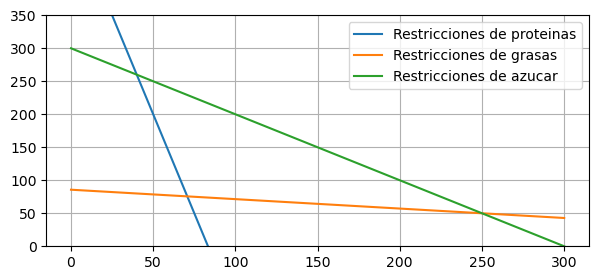

In [19]:
xa = np.linspace(0,300,2)
proteina = restriccion_prot(xa)
grasa = restriccion_gra(xa)
azucar = restriccion_azu(xa)

plt.figure(figsize=(7,3))
plt.plot(xa, proteina, label = "Restricciones de proteinas")
plt.plot(xa, grasa, label = "Restricciones de grasas")
plt.plot(xa, azucar, label = "Restricciones de azucar")
plt.grid()
plt.legend(loc = "best")
plt.ylim([0,350])
    

In [21]:
import sympy as sp
sp.var("x_a")
sp.solve(restriccion_prot(x_a) - restriccion_azu(x_a), x_a)


[40.0000000000000]

In [23]:
restriccion_azu(40)


260.0

In [25]:
sp.solve(restriccion_azu(x_a) - restriccion_gra(x_a), x_a)

[250.000000000000]

In [27]:
restriccion_azu(250)

50.0

In [31]:
def funcion_de_costo(xa, xb):
    return 0.6 * xa + 0.2*xb

In [33]:
funcion_de_costo(40,260)

76.0

In [35]:
funcion_de_costo(250,50)

160.0

Para analizar el producto minimizando costo sse deben usar:
+ 40 gr de producto A
+ 260gr de producto B
  
Costo final: 76 pesos

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**1.- Maximizar ganancia**

**2.- Autos en A, Camiones en A, Autos en B, Camiones en B**

**3.- 200aA + 600cA + 200aB + 600cB**

**4.- Nave A -> 300 do**

**Nave B -> 270 do**
    
**A se tarda 7 días p/c**
    
**2 días p/a**
               
**B se tarda 3 días p/c**
    
**3 días p/a**

**Nave A**
+ 2aA + 7cA <= 300
  
**Nave B**
+ 3aA + 3cB <= 270

**max 200aA + 600cA + 200aB + 600cB**

sujeto a:
+ 2aA + 7cA <= 300
+ 3aB + 3cB <= 270


In [44]:
def funcion_de_costo(a,c):
    return 600*c + 200*a

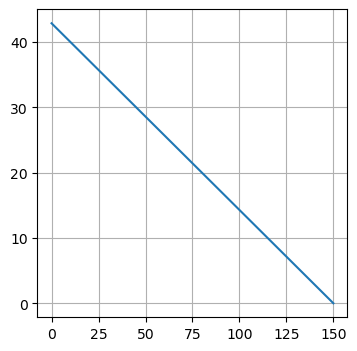

In [46]:
def restriccion_nave_A(a):
    return (300 - 2*a)/7

a = np.linspace(0,150,2)
plt.figure(figsize=(4,4))
plt.plot(a,restriccion_nave_A(a))
plt.grid()

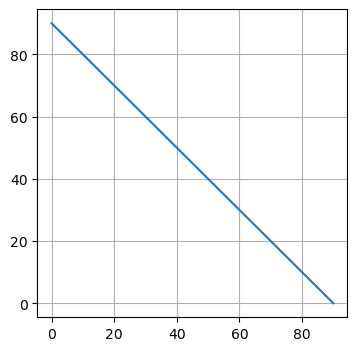

In [48]:
def restriccion_nave_B(a):
    return (270 - 3*a)/3

a = np.linspace(0,90,2)
plt.figure(figsize=(4,4))
plt.plot(a,restriccion_nave_B(a))
plt.grid()

In [89]:
import numpy as np
from scipy.optimize import linprog

c = np.array([
    -600, 
    -200
])


A_ub = np.array([
    [2, 7],  
    [3, 3],  
])

b_ub = np.array([
    300, 
    270
])


sol = linprog(c, A_ub=A_ub, b_ub=b_ub, method='highs')


if sol.success:
    print("Problema #1")
    print("El ingreso total es:", -sol.fun)
    print("Cantidad de camiones a fabricar:", sol.x[0])
    print("Cantidad de coches a fabricar:", sol.x[1])
else:
    print("No se encontró una solución óptima.")


Problema #1
El ingreso total es: 54000.0
Cantidad de camiones a fabricar: 90.0
Cantidad de coches a fabricar: 0.0


## A05.- Programación lineal

### Plantea los siguientes ejercicios como problemas de optimización con la estructura vista en clase:

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en **100 gramos**, se deben tener por lo menos **9 gramos de proteína y  7 gramos de grasa**. Así mismo, no se debe tener más de **2.5 gramos de fibra y 0.5 gramos de sal.**

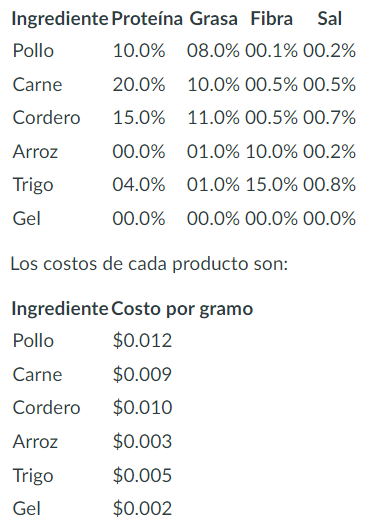

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, minimizando el costo total.

**1.- Identificar criterio de optimización (minimizar costos)**

**2.-¿Sabes que puedo influir? (Cantidad de A, cantidad de B, cantidad de C y cantidad de D)**

**3.-f(xA, xB, xC, xD, xE, xF)** $$0.012xA + 0.009xB + 0.010xC + 0.003xD + 0.005xE + 0.002xF = Minimizar_C$$


**4.- Información adicional (restricciones)**
+ Proteina >= 9gr, $$0.1xA + 0.2xB + 0.15xC + 0xD + 0.04xE + 0.00xF \geq 9$$
+ Grasas >= 7gr, $$0.08xA + 0.1xB + 0.11xC + 0.01xD + 0.01xE + 0.00xF \geq 7$$
+ Sal =< 0.5gr, $$0.001xA + 0.005xB + 0.005xC + 0.1xD + 0.15xE + 0.00xF \leq 0.5$$
+ Fibras =< 2.5gr, $$0.002xA + 0.005xB + 0.007xC + 0.002xD + 0.008xE + 0.00xF \leq 2.5$$

In [138]:
import numpy as np
from scipy.optimize import linprog

c = np.array([
    0.012,  # Pollo
    0.009,  # Carne
    0.010,  # Cordero
    0.003,  # Arroz
    0.005,  # Trigo
    0.002   # Gel
])

A_ub = np.array([
    [-0.1, -0.2, -0.15, 0, -0.04, 0],  # Proteína >= 9
    [-0.08, -0.1, -0.11, -0.01, -0.01, 0],  # Grasa >= 7
    [0.001, 0.005, 0.005, 0.1, 0.15, 0],  # Fibra <= 2.5
    [0.002, 0.005, 0.007, 0.002, 0.008, 0]   # Sal <= 0.5
])

b_ub = np.array([
    -9,   # Proteína
    -7,   # Grasa
    2.5,  # Fibra
    0.5   # Sal
])


A_eq = np.array([
    [1, 1, 1, 1, 1, 1]  # x1 + x2 + ... + x6 = 100
])

b_eq = np.array([100])


sol = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='highs')


if sol.success:
    print("Solución encontrada:")
    print("Costo mínimo de ingredientes:", sol.fun)
    print("Gramos de cada ingrediente en la mezcla óptima:")
    print(f"Pollo: {sol.x[0]:.2f} g")
    print(f"Carne: {sol.x[1]:.2f} g")
    print(f"Cordero: {sol.x[2]:.2f} g")
    print(f"Arroz: {sol.x[3]:.2f} g")
    print(f"Trigo: {sol.x[4]:.2f} g")
    print(f"Gel: {sol.x[5]:.2f} g")
else:
    print("No se encontró una solución óptima.")



Solución encontrada:
Costo mínimo de ingredientes: 0.69
Gramos de cada ingrediente en la mezcla óptima:
Pollo: 0.00 g
Carne: 70.00 g
Cordero: 0.00 g
Arroz: 0.00 g
Trigo: 0.00 g
Gel: 30.00 g


**Ejercicio 2**

La Comisión Federal de Electricidad (CFE) dispone de cuatro plantas de generación para satisfacer la demanda diaria eléctrica en cuatro ciudades, Guadalajara, León y Morelia. Las plantas 1, 2 y 3 pueden satisfacer 75, 50 y 60 millones de kW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de 60, 45 y 60 millones de Kw al día respectivamente.

Los costos asociados al envío de suministro energético por cada millón de kW entre cada planta y cada ciudad son los registrados en la siguiente tabla.


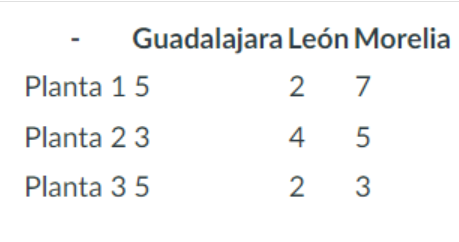

**1.- Identificar criterio de optimización (minimizar costos)**

**2.-¿Sabes que puedo influir? (Cantidad de A, cantidad de B, cantidad de C y cantidad de D)**

**3.-f(x1G, x1L, x1M, x2G, x2L, x2M, x3G, x3L, x3M)** $$x_{1G} + x_{1L} + x_{1M} + x_{2G} + x_{2L} + x_{2M} + x_{3G} + x_{3L} + x_{3M} = Minimizar_C$$


**4.- Información adicional (restricciones)**
+ Necesidad de las plantas
 $$x1G + x2G + x3G \leq 60$$
 $$x1L + x2L + x3L \leq 45$$
 $$x1M + x2M + x3M \leq 60$$

+ Capacidad de las plantas
 $$x1G + x1L + x1M \geq 75$$
 $$x2G + x2L + x2M \geq 50$$
 $$x3G + x3L + x3M \geq 60$$

In [129]:
import numpy as np
from scipy.optimize import linprog

c = np.array([
    5, 2, 7,   # Planta 1 a Guadalajara, León, Morelia
    3, 4, 5,   # Planta 2 a Guadalajara, León, Morelia
    5, 2, 3    # Planta 3 a Guadalajara, León, Morelia
])


aub = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],  # Planta 1 capacidad
    [0, 0, 0, 1, 1, 1, 0, 0, 0],  # Planta 2 capacidad
    [0, 0, 0, 0, 0, 0, 1, 1, 1],  # Planta 3 capacidad
    [-1, 0, 0, -1, 0, 0, -1, 0, 0],  # Guadalajara demanda
    [0, -1, 0, 0, -1, 0, 0, -1, 0],  # León demanda
    [0, 0, -1, 0, 0, -1, 0, 0, -1]   # Morelia demanda
])


bub = np.array([
    75,   # Capacidad Planta 1
    50,   # Capacidad Planta 2
    60,   # Capacidad Planta 3
    -60,  # Demanda Guadalajara
    -45,  # Demanda León
    -60   # Demanda Morelia
])


sol = linprog(c, A_ub=aub, b_ub=bub, method='highs')

if sol.success:
    print("Solución encontrada:")
    print("Costo mínimo de transporte:", sol.fun)
    print("Cantidad de energía enviada desde cada planta a cada ciudad:")
    print("Planta 1 a Guadalajara, León, Morelia:", sol.x[:3])
    print("Planta 2 a Guadalajara, León, Morelia:", sol.x[3:6])
    print("Planta 3 a Guadalajara, León, Morelia:", sol.x[6:])
else:
    print("No se encontró una solución óptima.")


Solución encontrada:
Costo mínimo de transporte: 470.0
Cantidad de energía enviada desde cada planta a cada ciudad:
Planta 1 a Guadalajara, León, Morelia: [10. 45.  0.]
Planta 2 a Guadalajara, León, Morelia: [50.  0.  0.]
Planta 3 a Guadalajara, León, Morelia: [ 0.  0. 60.]


## A06.- Programación lineal

Usa los 5 pasos vistos en clase para plantear adecuadamente el siguiente ejercicio. Después, utiliza linprog para resolverlo.

**Ejercicio 1.**

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:



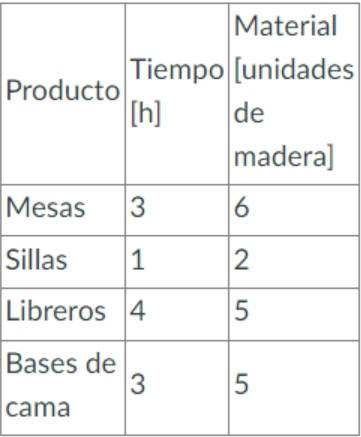

Las mesas se venden en $9000$, las sillas en $3000$, los libreros en $10000$, y las bases de cama en $9000$. Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

¿Cuántas horas trabaja cada quién?

¿Cuánto material se usa?

¿Cuál se el ingreso total si se vende todo lo fabricado?

2. La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

¿Se puede cumplir la orden?

Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?

¿Cuántas horas trabaja cada quién?

¿Cuánto material se usa?

¿Cuál es el nuevo ingreso total?

**1.- Identificar criterio de optimización (Maximizar las ganancias)**

**2.-¿Sabes que puedo influir?**
+ $$x_{ME} : Num. de Mesas$$
+ $$x_{SE} : Num. de Sillas$$
+ $$x_{LE} : Num. de Libreros$$
+ $$x_{BE} : Num. de Bases de cama$$
+ $$x_{MA} : Num. de Mesas, APRENDIZ$$
+ $$x_{SA} : Num. de Sillas, APRENDIZ$$
+ $$x_{LA} : Num. de Libreros, APRENDIZ$$
+ $$x_{BA} : Num. de Bases de cama, APRENDIZ$$


**3.-f(xME,xSE,xLE,xBE,xMA,xSA,xLA,xBA)** $$Maximizar =9000x_{ME} + 3000x_{SE} + 10000x_{LE} + 9000x_{BE} + 9000x_{MA} + 3000x_{SA} + 10000x_{LA} + 9000x_{BA}$$


**4.- Información adicional (restricciones)**

**Trabajador experimentado**
+ $$Mesas: 3x_{ME} hrs$$
+ $$Sillas: x_{SE} hrs$$
+ $$Libreros: 4x_{LE} hrs$$
+ $$Bases de cama: 3x_{BE} hrs$$
**Tiempo total $$\leq 40$$**

+ $$Mesas: 6x_{ME} unidades$$
+ $$Sillas: 2x_{SE} unidades $$
+ $$Libreros : 5x_{LE} unidades$$
+ $$Bases de cama : 5x_{BE} unidades$$
**Unidades totales $$\leq 100$$**

**Aprendiz (50% mas)**
+ $$Mesas: 4.5x_{MA} hrs$$
+ $$Sillas: 1.5x_{SA} hrs$$
+ $$Libreros: 6x_{LA} hrs$$
+ $$Bases de cama: 4.5x_{BA} hrs$$
**Tiempo total $$\leq 40$$**
  
**Aprendiz (20% mas)**
+ $$Mesas: 7.2x_{MA} unidades$$
+ $$Sillas: 2.4x_{SA} unidades $$
+ $$Libreros : 6x_{LA} unidades$$
+ $$Bases de cama : 6x_{BA} unidades$$
**Unidades totales $$\leq 100$$**
  
  

$$ 3x_{ME} + x_{SE} + 4x_{LE} + 3x_{BE} \leq 40$$
$$ 4.5x_{MA} + 1.5x_{SA} + 6x_{LA} + 4x_{BA} \leq 40$$
$$ 6x_{ME} + 2x_{SE} + 5x_{LE} + 5x_{BE} + 7.2x_{MA} + 2.4x_{SA} + 6x_{LA} + 6x_{BA} \leq 100$$


In [108]:
import numpy as np
c = np.array([
    -9000,
    -3000,
    -10000,
    -9000,
    -9000,
    -3000,
    -10000,
    -9000,

])

aub = np.array([
    [3,1,4,3,0,0,0,0],
    [6,2,5,5,7.2,2.4,6,6],
    [0,0,0,0,4.5,1.5,6,4.5],
    
])

bub =np.array([
    40, 
    100, 
    40, 

])

import scipy.optimize as opt
sol = opt.linprog(c, aub, bub,integrality=1)
print("Problema #1")
print("el ingreso total es:", sol.fun*-1)
print("las horas trabajadas por el experto son: ", np.dot(sol.x,[3,1,4,3,0,0,0,0]))
print("las horas trabajadas por el aprendiz son: ", np.dot(sol.x,[0,0,0,0,4.5,1.5,6,4.5]))
print("las unidades usadas son: ", np.dot(sol.x,[6,2,5,5,7.2,2.4,6,6]))

Problema #1
el ingreso total es: 176000.0
las horas trabajadas por el experto son:  40.0
las horas trabajadas por el aprendiz son:  39.0
las unidades usadas son:  100.0


In [110]:
import numpy as np
c = np.array([
    -9000,
    -3000,
    -10000,
    -9000,
    -9000,
    -3000,
    -10000,
    -9000,
])

aub = np.array([
    [3,1,4,3,0,0,0,0],
    [6,2,5,5,7.2,2.4,6,6],
    [0,0,0,0,4.5,1.5,6,4.5],
    [-1,0,0,0,-1,0,0,0],
    [0,-1,0,0,0,-1,0,0],
    
])

bub =np.array([
    40, 
    100, 
    40,
    -3,
    -18,

])

import scipy.optimize as opt
sol = opt.linprog(c, aub, bub,integrality=1)
sol
print("Problema #2")
print("el ingreso total es:", sol.fun*-1)
print("las horas trabajadas por el experto son: ", np.dot(sol.x,[3,1,4,3,0,0,0,0]))
print("las horas trabajadas por el aprendiz son: ", np.dot(sol.x,[0,0,0,0,4.5,1.5,6,4.5]))
print("las unidades usadas son: ", np.dot(sol.x,[6,2,5,5,7.2,2.4,6,6]))

Problema #2
el ingreso total es: 161000.0
las horas trabajadas por el experto son:  39.0
las horas trabajadas por el aprendiz son:  30.0
las unidades usadas son:  99.0
